In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'legend.framealpha': 1})
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import AutoMinorLocator

In [3]:
def orderplot(a,b):
    plotable = [[a[i], b[i]] for i in range(size(a))]
    plotable.sort(key=lambda x: x[0])
    plotable = numpy.array(plotable)
    return plotable

In [4]:
dataWN = genfromtxt('ryan_summary_file.dat',dtype='str')
dataTEMP = np.delete(dataWN, 0, 1)
dataTEMP = dataTEMP.astype(float)
print ( dataWN[0,:], '\n', size(dataWN[0,:]), '\n', '\n',dataTEMP[0,:], '\n', size(dataTEMP[0,:]))

['b10_3p' '5.000' '5.000' '0.602' '0.366' '0.602' '0.366' '151.641'
 '151.641' '89.107' '75.787' '89.107' '75.787' '4.998' '0.082' '0.074'
 '2.360' '4.998' '0.082' '0.074' '2.360' '10.002' '24.999' '10.002'
 '0.016' '0.032' '0.016' '3.616' '3.437' '3.616' '0' '5' '5'] 
 33 
 
 [5.00000e+00 5.00000e+00 6.02000e-01 3.66000e-01 6.02000e-01 3.66000e-01
 1.51641e+02 1.51641e+02 8.91070e+01 7.57870e+01 8.91070e+01 7.57870e+01
 4.99800e+00 8.20000e-02 7.40000e-02 2.36000e+00 4.99800e+00 8.20000e-02
 7.40000e-02 2.36000e+00 1.00020e+01 2.49990e+01 1.00020e+01 1.60000e-02
 3.20000e-02 1.60000e-02 3.61600e+00 3.43700e+00 3.61600e+00 0.00000e+00
 5.00000e+00 5.00000e+00] 
 32


In [5]:
data=dataTEMP
normPindex = 0
normNindex = 1
dabigA2 = zeros(size(data[:,0]))
dabigA = zeros(size(data[:,0]))
i=0
Zindex = 30
Nindex = 31
while i<size(data[:,0]):
    dabigA[i] = data[i,Zindex]+data[i,Nindex]
    dabigA2[i] = dabigA[i]+.1*(data[i,Nindex]-data[i,Zindex])
    #print(data[i,0], dabigA2[i])
    i+=1

In [6]:
h2index = 16
dataWN[h2index ,0]

'h2'

In [7]:
tagIndex = 29
i=0
while i<size(dataWN[:,0]):
    if "b10" in dataWN[i,0] or "be10" in dataWN[i,0] or "he6" in dataWN[i,0] or "he8" in dataWN[i,0] or "li9" in dataWN[i,0]:
        dataTEMP[i,tagIndex] = 1
    i+=1
i=0
while i<size(data[:,0]):
    if data[i,0] != 0 and data[i,tagIndex] == 1:
        print(dataWN[i,0])
    i+=1

b10_3p
b11
be10_0p
be9
c12
ca40
h2
h3
he3
he4
he6
he8
li8
li9
o16


In [8]:
deut = 2.5 * data[h2index , normPindex] + 1 * data[h2index , normNindex]

Text(0.5, 1.0, 'Aprox. cross section ratio at x>1')

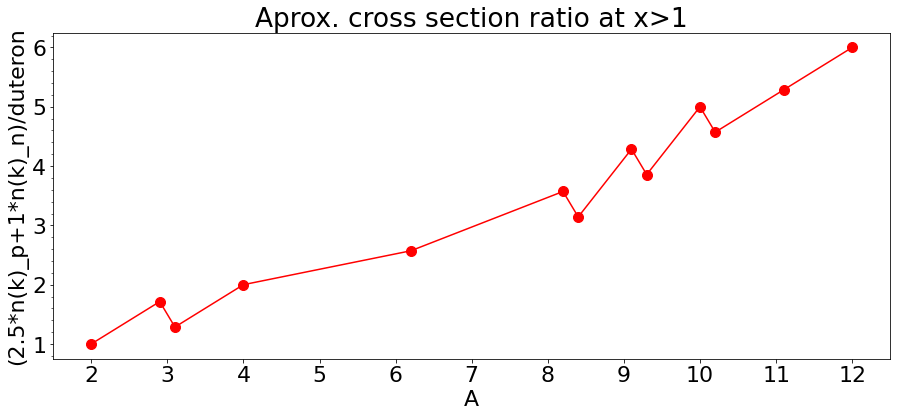

In [9]:
sized = 10
plt.figure(figsize=(15, 6))
plt.xticks(range(0, 21))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

crosshold = []
Aoffhold = []
momhold = []

i=0
while i<size(data[:,0]):
    if float(data[i,1]) != 0 and float(data[i,tagIndex]) == 1 and dabigA2[i] <= 12:
        NORM =  data[i,normPindex] + data[i,normNindex]
        NORMP = data[i,normPindex] 
        NORMN = data[i,normNindex]
        elem = 2.5 * data[i , normPindex] + 1 * data[i , normNindex]
        crosshold.append(elem/deut)
        Aoffhold.append(dabigA2[i])
        momhold.append(NORM)
    i+=1
    
crossplotA = orderplot(Aoffhold, crosshold)
crossplot = orderplot(momhold, crosshold)
#plot(crossplot[:,0], crossplot[:,1], '-b^',markersize=sized,label='NORM')
plot(crossplotA[:,0], crossplotA[:,1], '-ro',markersize=sized,label='A2')
xlabel('A')
ylabel('(2.5*n(k)_p+1*n(k)_n)/duteron')
title('Aprox. cross section ratio at x>1')